# Density-Based Clustering with USA Arrest Data Set

## 1. Data Collection

**Description:**

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

The data set has 50 record stand for 50 US states and 4 variables as the following:
- **Murder**: Murder arrests (per 100 000) 
- **Assault**: Assault arrests (per 100 000) 
- **Rape** : Rape arrests (per 100 000)
- **UrbanPop**: Percent urban population


## 2. Data Presentation

In [13]:
dat_raw = USArrests
head(dat_raw)
summary(dat_raw)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

In [14]:
#options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 200)
#require(graphics)
#pairs(dat_raw, panel = panel.smooth, main = "USArrests data")

#Scale data set
dat = scale(dat_raw[-3])

[1] 0.6859042

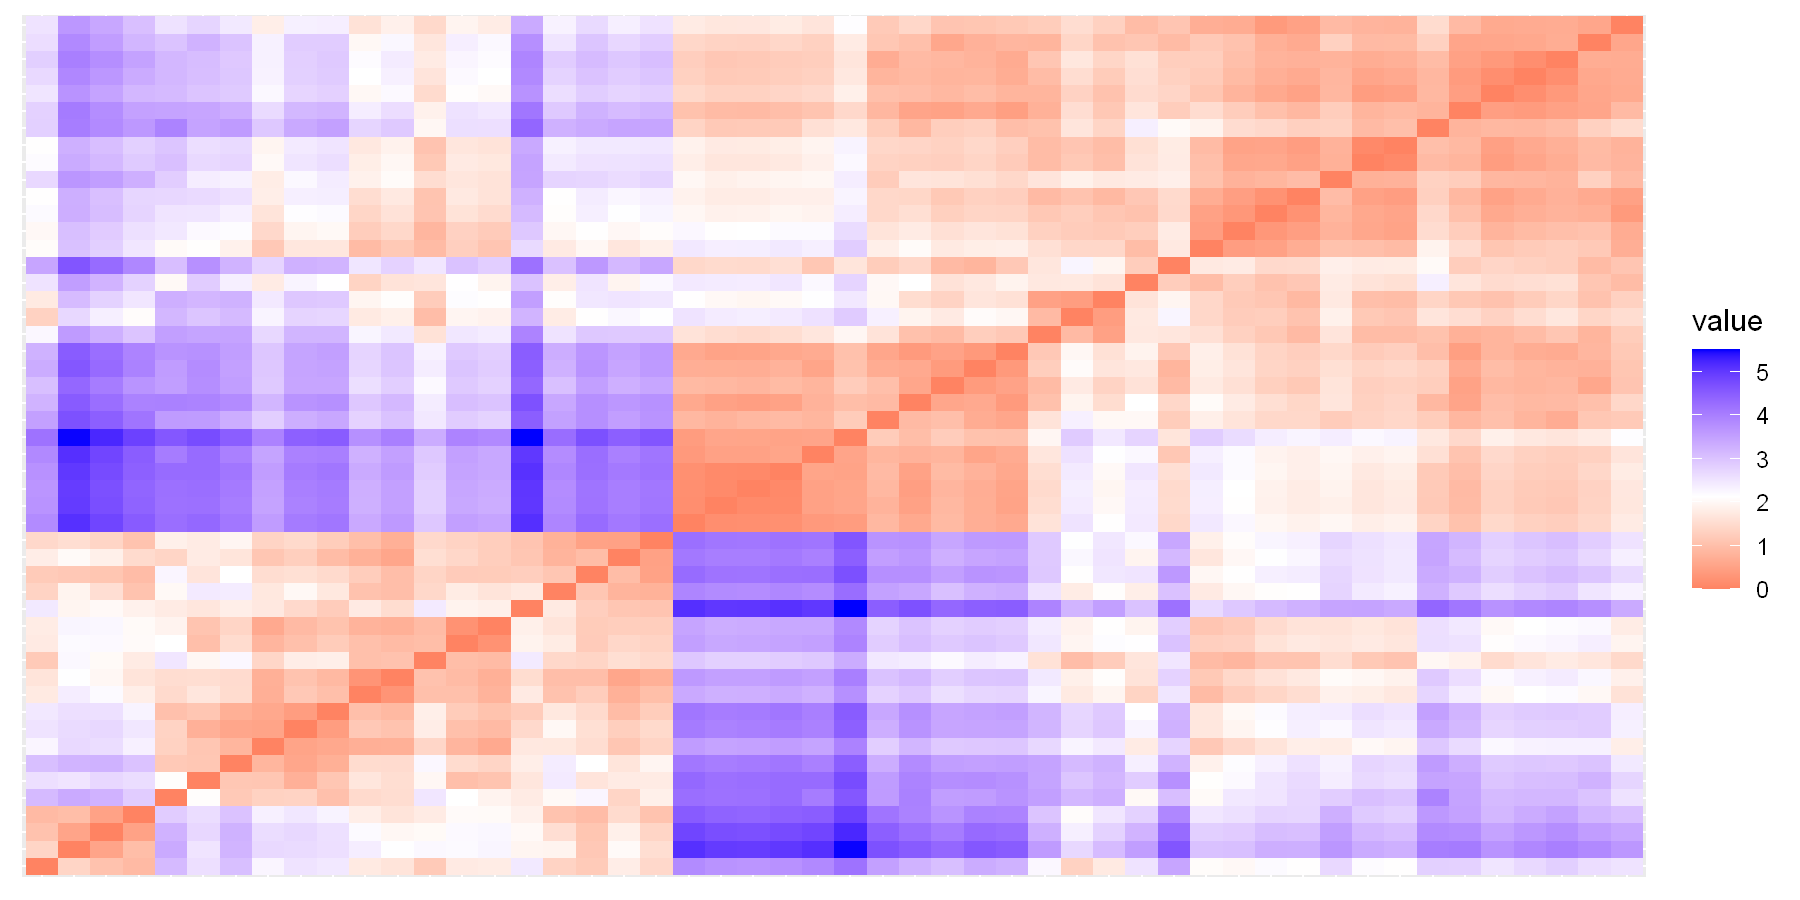

In [15]:
require(cluster)
require(factoextra)
require(NbClust)
cls = get_clust_tendency(dat,n=49,graph=T)
cls$hopkins
cls$plot

## 3. Analysis and Interpretation

### 3.1. Analysis with K-mean Methods

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



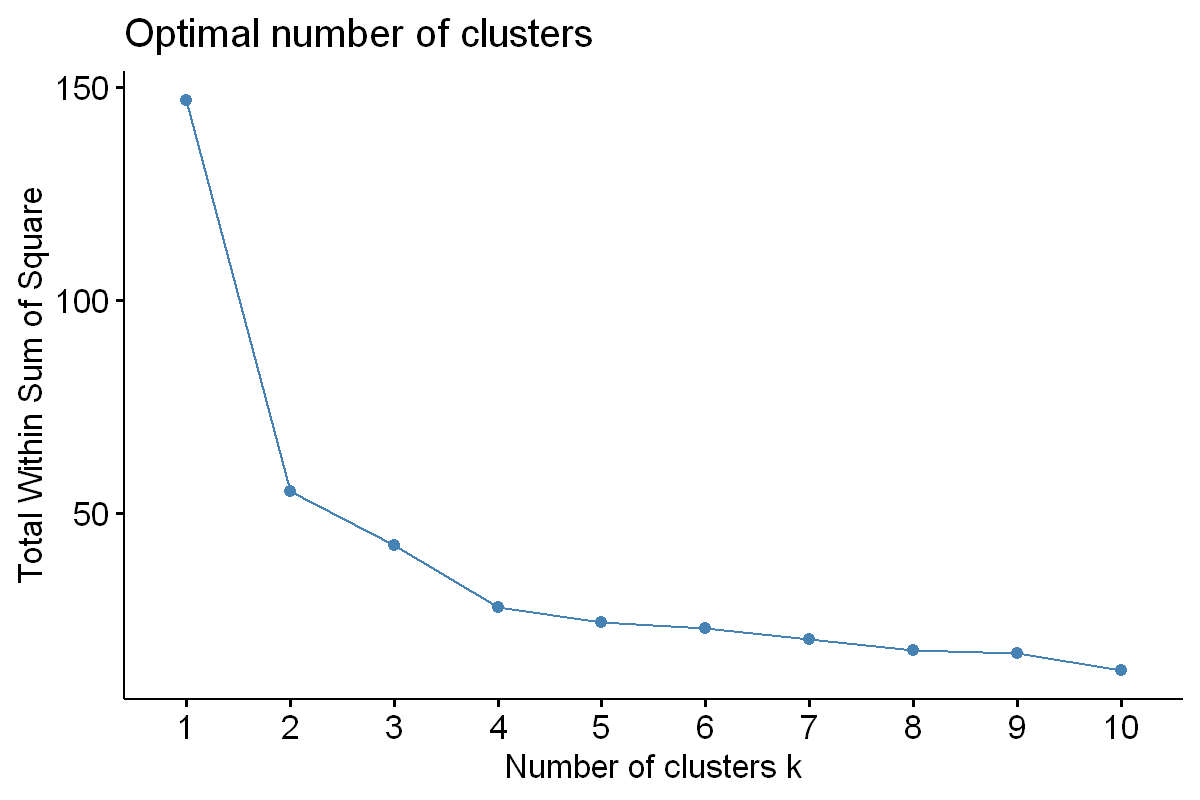

In [23]:
#install.packages("factoextra")
#install.packages("NbClust")
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
fviz_nbclust(dat, kmeans, method = "wss") + geom_line()

#### Chọn k = 4, số cụm ít, sự khác biệt giữa các cá thể trong cụm cũng ít.

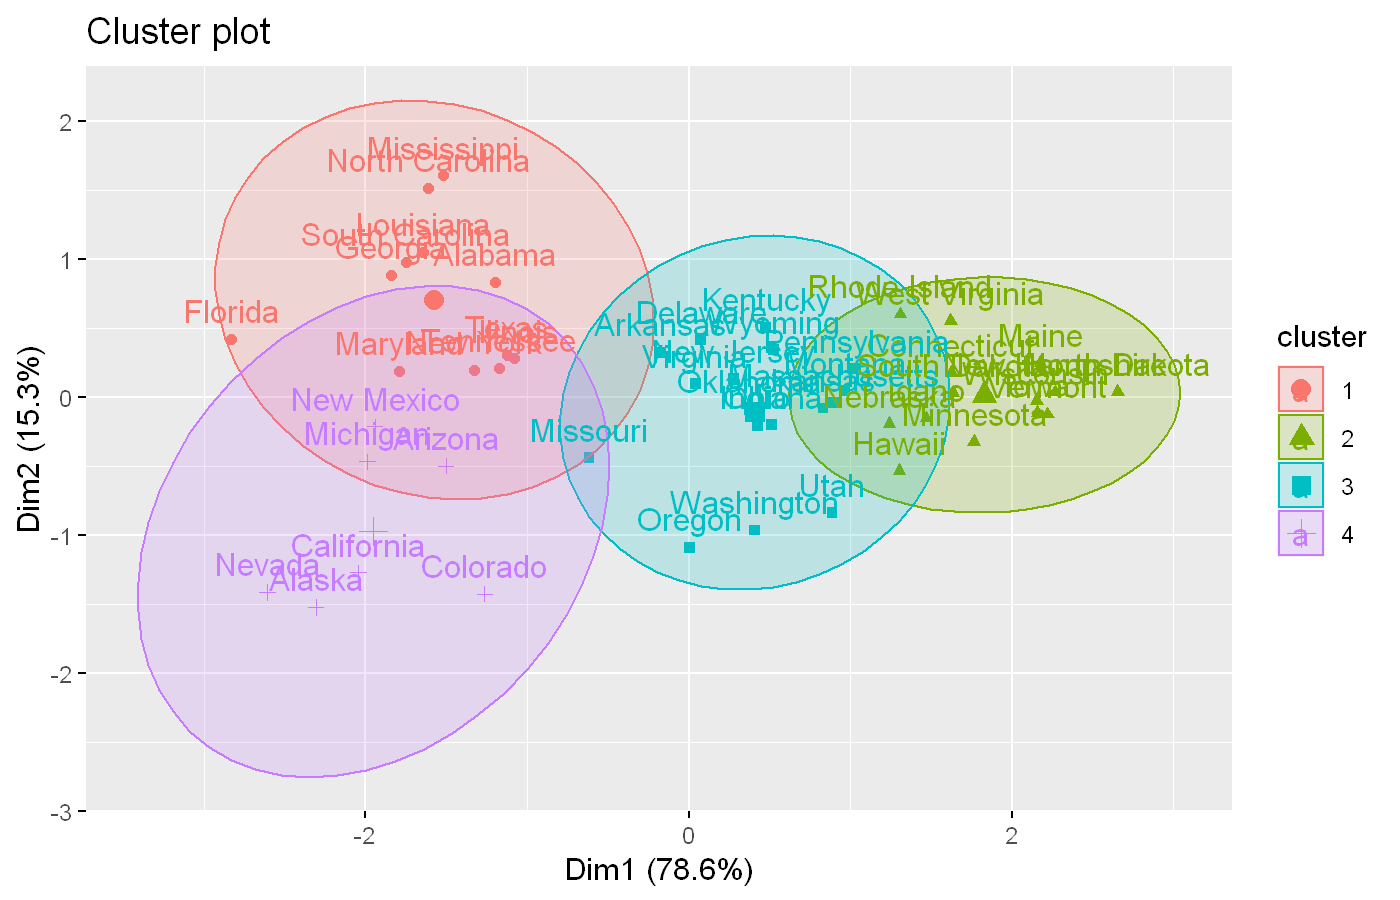

In [24]:
km = kmeans(dat,centers = 4)
options(repr.plot.width = 7, repr.plot.height = 4.5, repr.plot.res = 200)
fviz_cluster(km, dat, ellipse.type = "norm")

### Validation

  cluster size ave.sil.width
1       1   12          0.38
2       2   14          0.46
3       3   17          0.34
4       4    7          0.40


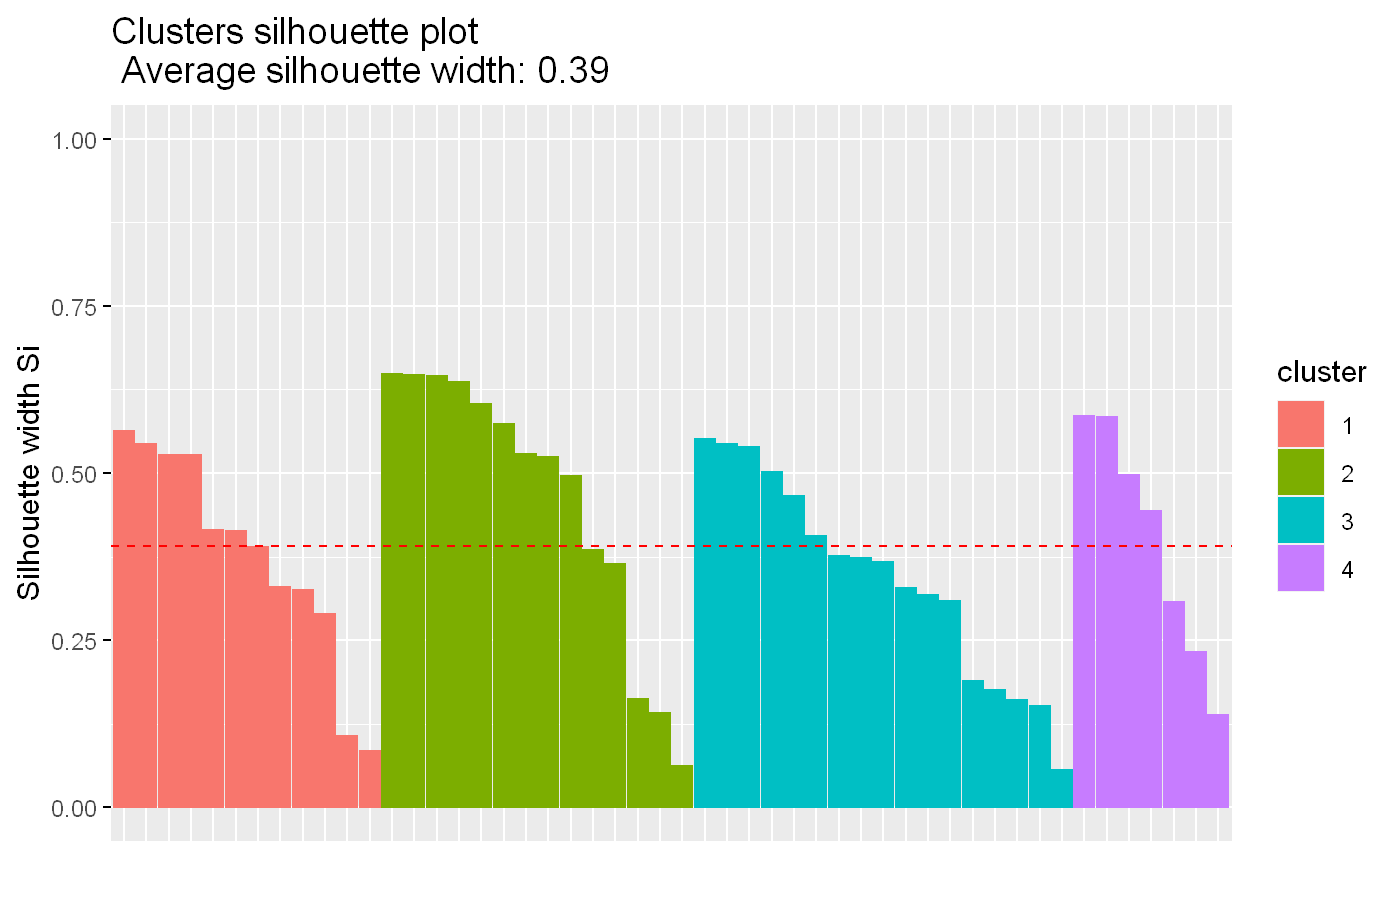

In [25]:
require(cluster)
sil = silhouette(km$cluster,dist(dat))
fviz_silhouette(sil)

### 3.2. Analysis with Density-Based Methods

,Murder,Assault,Rape
Alabama,1.24256408,0.7828393,-0.003416473
Alaska,0.50786248,1.1068225,2.484202941
Arizona,0.07163341,1.4788032,1.042878388
Arkansas,0.23234938,0.2308680,-0.184916602
California,0.27826823,1.2628144,2.067820292
Colorado,0.02571456,0.3988593,1.864967207


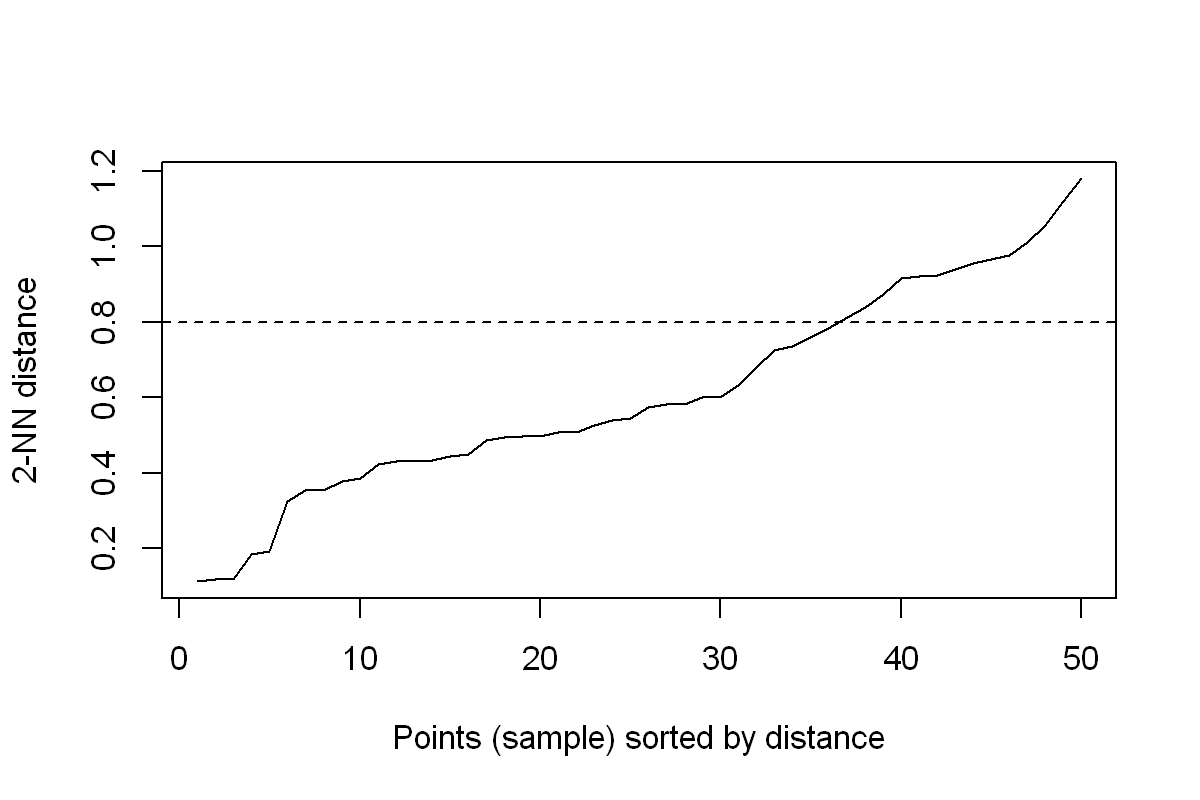

In [26]:
#install.packages("fpc")
require(fpc)
require(dbscan)
#Obtaining optimal Eps value
dens_dat = dat
head(dens_dat)
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
kNNdistplot(dens_dat, k = 2)
abline(h=0.8,lty=2)

In [27]:
#Density-Based Clustering with DBSCAN
set.seed(25)
density <- fpc::dbscan(dens_dat
                   ,eps=0.8
                   ,MinPts=4)
density

dbscan Pts=50 MinPts=4 eps=0.8
        0  1  2
border 12  5  1
seed    0  8 24
total  12 13 25

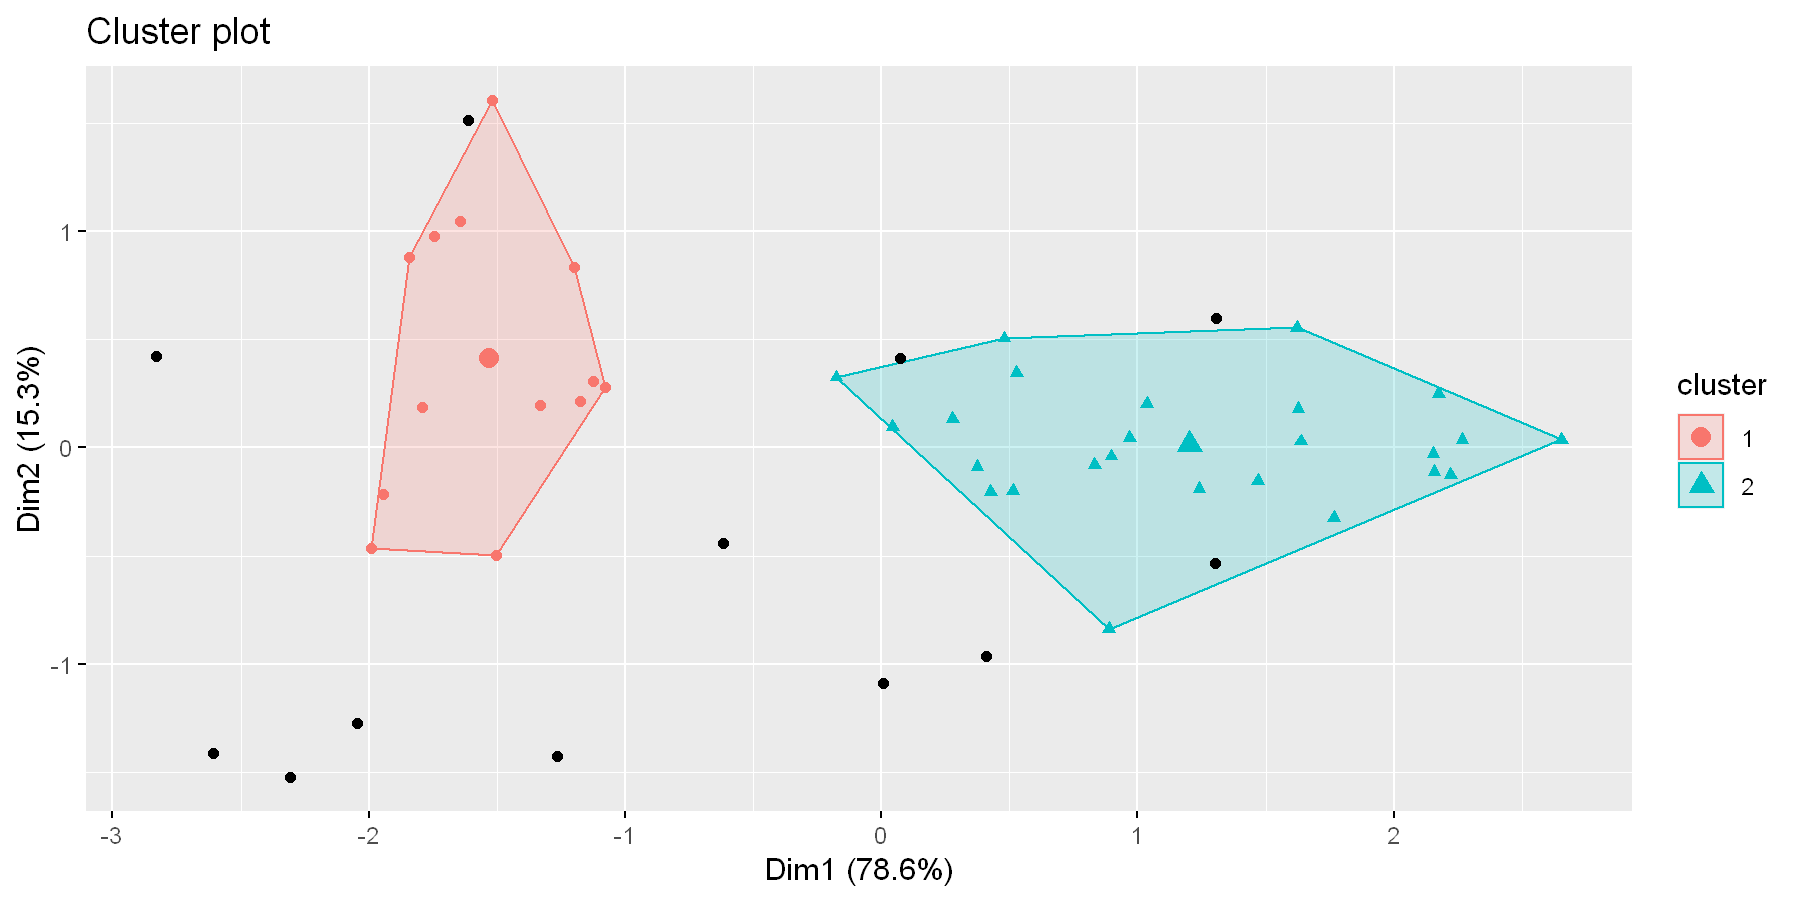

In [28]:
options(repr.plot.width = 9, repr.plot.height = 4.5, repr.plot.res = 200)
res = fviz_cluster(density,dens_dat,geom = "point")
res

### Validation

  cluster size ave.sil.width
0       0   12         -0.27
1       1   13          0.46
2       2   25          0.54


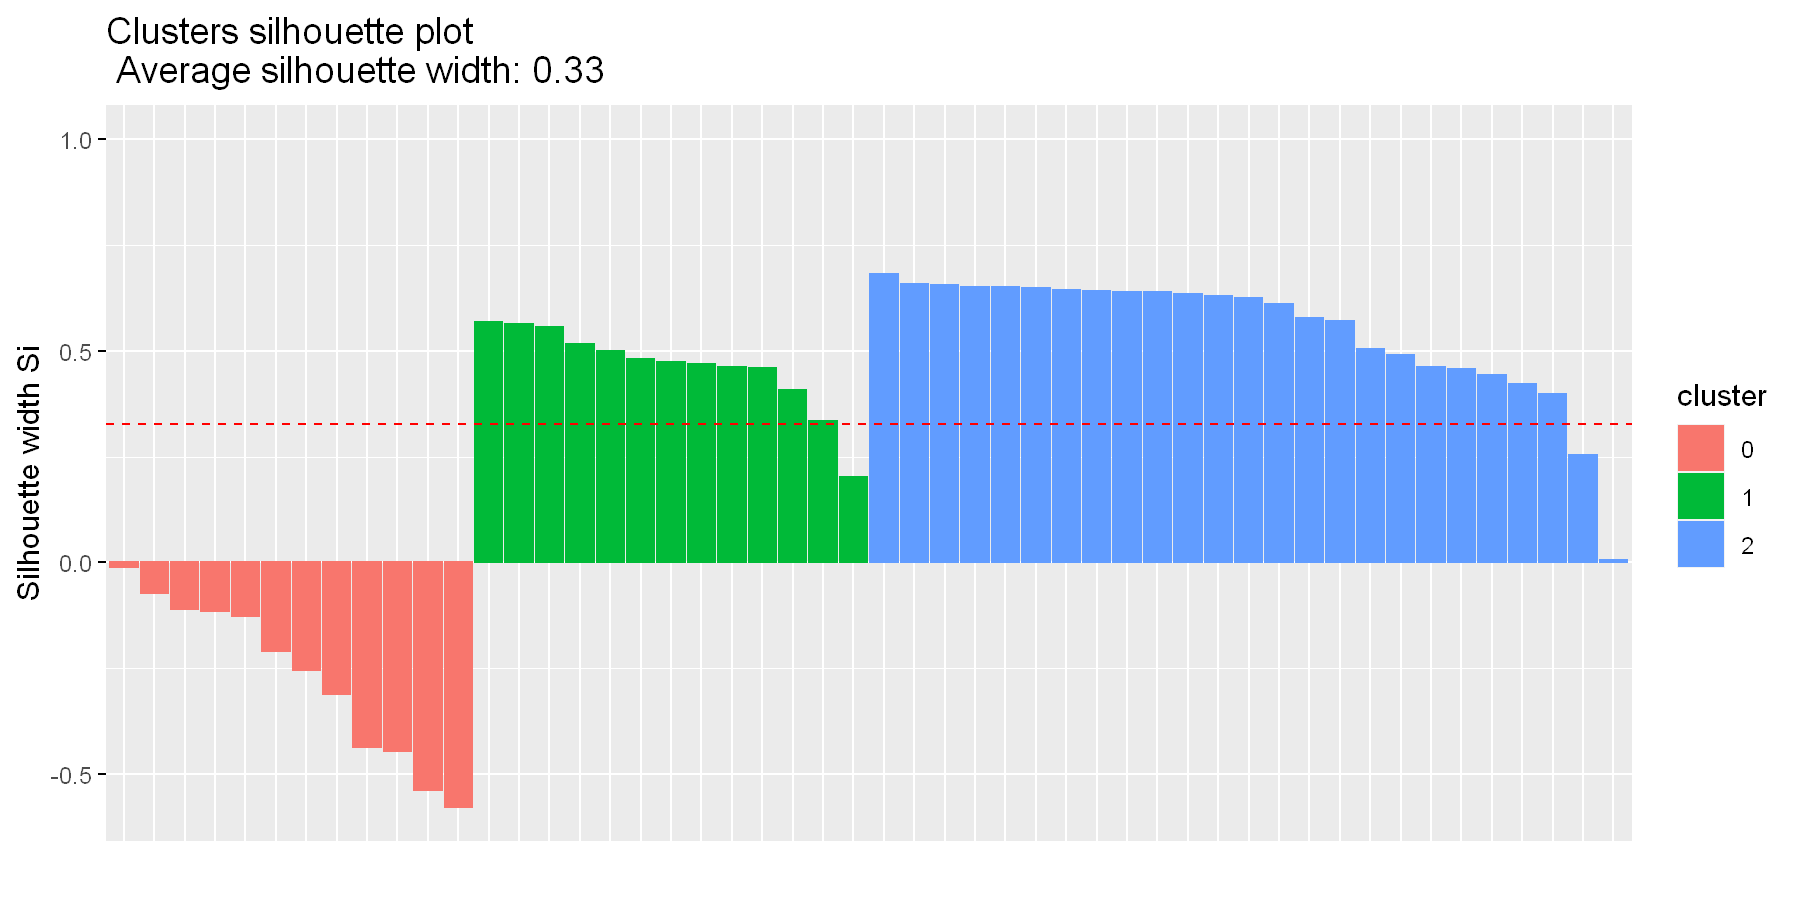

In [29]:
sil_dens = silhouette(density$cluster,dist(dat))
fviz_silhouette(sil_dens)